# Why are we doing math? Lets just learn AI???
- AI is math...
- We need to understand some basic statistics in order to actually develop a model
- I want you to learn! not use a black box 

****

# Histogram

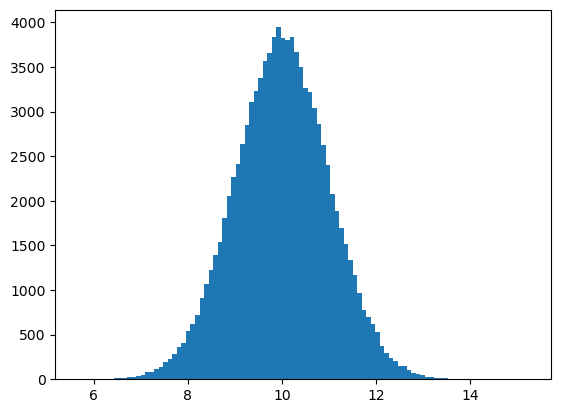

In [11]:
import numpy
import matplotlib.pyplot as plt

N = 100000
mean = 10.0
standard_deviation = 1

x = numpy.random.normal(mean, standard_deviation, N)

plt.hist(x, 100)
plt.show() 

# What is this?
- We use a _histogram_ to visualize data
- _mean_ is the average
- _standard deviation_ indicates how spread out data is from the mean 

****
# Scatter Plot

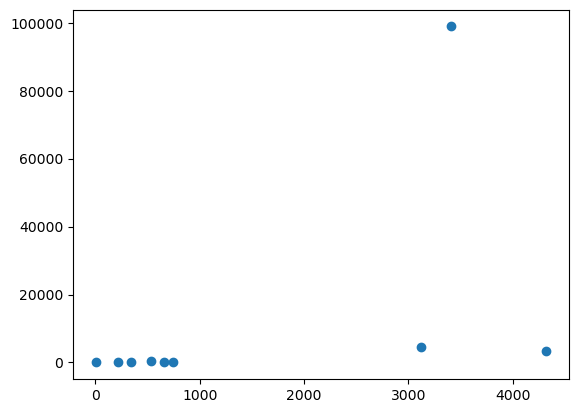

In [3]:
import matplotlib.pyplot as plt
x = [1, 212, 3123, 3412, 341, 536, 4323, 654, 745] # pseudo random numbers I made up
y = [213, 241, 4643, 98920, 23, 423, 3423, 0, 21]

plt.scatter(x, y)
plt.show()

## What would happen if I added a bunch of numbers?

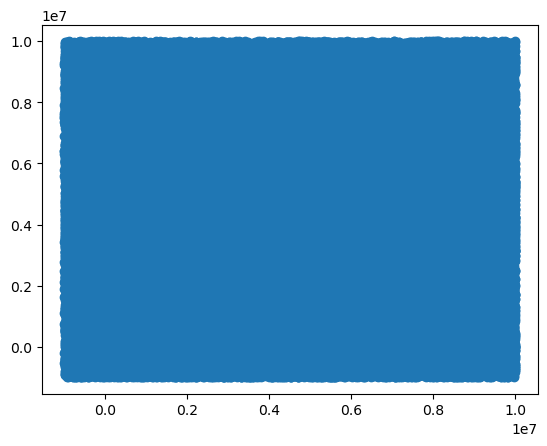

In [10]:
import matplotlib.pyplot as plt
import random

x = [1, 212, 3123, 3412, 341, 536, 4323, 654, 745] # pseudo random numbers I made up
y = [213, 241, 4643, 98920, 23, 423, 3423, 0, 21]

top = 10000000
bottom = -1000000

for l in range(100000):
    x.append(random.randint(bottom, top))
    y.append(random.randint(bottom, top))

plt.scatter(x, y)
plt.show()

## Wow!
- If we add enough numbers the graph is completely solid
- but it has a chance of not being solid! 
- try decreasing the number of loops to see what happens 

****
# Linear Regression

-1.7512877115526118 103.10596026490066 -0.758591524376155 0.0026468739224561064


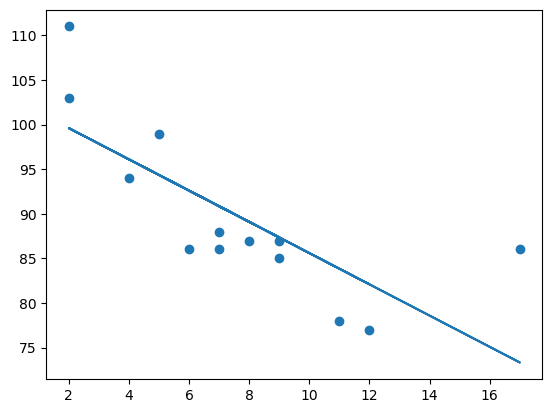

In [22]:
import matplotlib.pyplot as plt
from scipy import stats

x = [5,7,8,7,2,17,2,9,4,11,12,9,6]
y = [99,86,87,88,111,86,103,87,94,78,77,85,86]

slope, intercept, r, p, std_err = stats.linregress(x, y) # calculate the relationship, estimate

print(slope, intercept, r, p)

# try changing this function!
def myfunction(x):
    return slope * x + intercept

mymodel = list(map(myfunction, x))
plt.scatter(x, y)
plt.plot(x, mymodel)
plt.show()

## What is going on???
- _linear regression_ is used to model a relationship between a dependent variable and a (or many) independent variables
  - in this case __x__ and __y__
  - _estimates the linear relationship between a scalar response_
  - for clarities sake x and y are our scalars, x being independent and y being dependent on x
  - our slope and y intercept are also scalar values
- We can use linear regression to predict outcomes!
- There are many other types of _regression_ that allow us to make other types of predictions (logistic, multiple [linear] regression, ridge, lasso, etc)

### Variables
- __slope__: steepness and the direction of the line
- __intercept__: where the line meets the y axis 
- __r__: strength and direction of the linear relationship between the two variables
- __p__: hypothesis test whose null hypothesis is that the slope of the regression line is zero
- __std err__: the error in estimation, _important_ for training

**** 

# Predicting Future Values

In [23]:
from scipy import stats

slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
  return slope * x + intercept

speed = myfunc(10)

print(speed) 

85.59308314937454


****
# Polynomial Regression

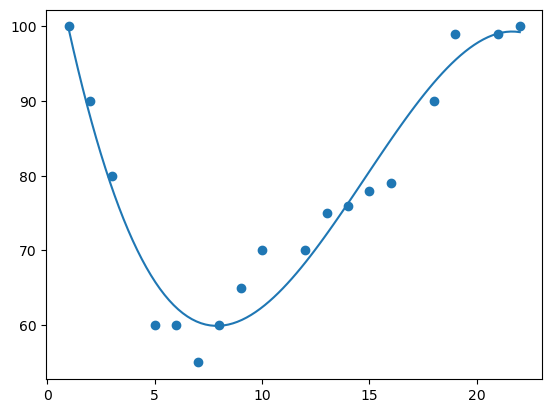

In [25]:
import numpy
import matplotlib.pyplot as plt

x = [1,2,3,5,6,7,8,9,10,12,13,14,15,16,18,19,21,22]
y = [100,90,80,60,60,55,60,65,70,70,75,76,78,79,90,99,99,100]

mymodel = numpy.poly1d(numpy.polyfit(x, y, 3))

myline = numpy.linspace(1, 22, 100)

plt.scatter(x, y)
plt.plot(myline, mymodel(myline))
plt.show() 

****
# Scaling our Values

In [7]:
import pandas
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

df = pandas.read_csv("data.csv")

X = df[['Weight', 'Volume']]

scaledX = scale.fit_transform(X)

print(scaledX) 

[[-2.10389253 -1.59336644]
 [-0.55407235 -1.07190106]
 [-1.52166278 -1.59336644]
 [-1.78973979 -1.85409913]
 [-0.63784641 -0.28970299]
 [-1.52166278 -1.59336644]
 [-0.76769621 -0.55043568]
 [ 0.3046118  -0.28970299]
 [-0.7551301  -0.28970299]
 [-0.59595938 -0.0289703 ]
 [-1.30803892 -1.33263375]
 [-1.26615189 -0.81116837]
 [-0.7551301  -1.59336644]
 [-0.16871166 -0.0289703 ]
 [ 0.14125238 -0.0289703 ]
 [ 0.15800719 -0.0289703 ]
 [ 0.3046118  -0.0289703 ]
 [-0.05142797  1.53542584]
 [-0.72580918 -0.0289703 ]
 [ 0.14962979  1.01396046]
 [ 1.2219378  -0.0289703 ]
 [ 0.5685001   1.01396046]
 [ 0.3046118   1.27469315]
 [ 0.51404696 -0.0289703 ]
 [ 0.51404696  1.01396046]
 [ 0.72348212 -0.28970299]
 [ 0.8281997   1.01396046]
 [ 1.81254495  1.01396046]
 [ 0.96642691 -0.0289703 ]
 [ 1.72877089  1.01396046]
 [ 1.30990057  1.27469315]
 [ 1.90050772  1.01396046]
 [-0.23991961 -0.0289703 ]
 [ 0.40932938 -0.0289703 ]
 [ 0.47215993 -0.0289703 ]
 [ 0.4302729   2.31762392]]


## What are all these numbers?

- we standardize data
  - $z = (x - u) / s$
  - _x_: original value
  - _z_: new value
  - _u_: mean
  - _s_: standard deviation
- scaling our values so they are more easily comparable
- as you can see these values are much closer together than our input values

In [4]:
import pandas as pd
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()

df = pd.read_csv("data.csv")

X = df[['Weight', 'Volume']]
y = df['CO2']

# Scale the independent variables
scaledX = scale.fit_transform(X)

# Train the linear regression model
regr = linear_model.LinearRegression()
regr.fit(scaledX, y)

# Scale new input data 
new_data = pd.DataFrame([[2300, 1.3]], columns=['Weight', 'Volume'])
scaled = scale.transform(new_data)

# Predict CO2 emissions using the trained model
predictedCO2 = regr.predict(scaled)
print(predictedCO2)

[97.07204485]


****
    
# Train / Test
- a train test split allows us to evaluate the quality of our model
- we can see how the model responds to unseen data
- we will use a __training set__ (typically _80%_ of our data)
- as well as a __testing set__ (typically the other _20%_ of our data)

In [16]:
data = []
for i in range(100):
    data.append(i)

# Get 80 of the length
split = int(len(data) * 0.8)

train = data[:split] 
test = data[split:]

print("Train 80%:\n\n", train, "\n")
print("-----------------------------------\n")
print("Test 20%:\n\n", test, "\n\n")

Train 80%:

 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79] 

-----------------------------------

Test 20%:

 [80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99] 




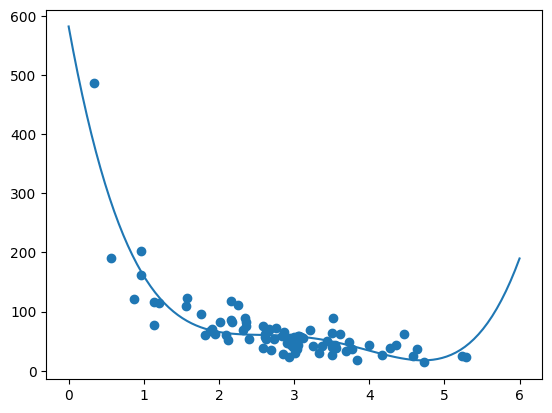

In [18]:
import numpy
import matplotlib.pyplot as plt
numpy.random.seed(2)

x = numpy.random.normal(3, 1, 100)
y = numpy.random.normal(150, 40, 100) / x

train_x = x[:80]
train_y = y[:80]

test_x = x[80:]
test_y = y[80:]

mymodel = numpy.poly1d(numpy.polyfit(train_x, train_y, 4))

myline = numpy.linspace(0, 6, 100)

plt.scatter(train_x, train_y)
plt.plot(myline, mymodel(myline))
plt.show() 

In [19]:
import numpy
from sklearn.metrics import r2_score
numpy.random.seed(2)

x = numpy.random.normal(3, 1, 100)
y = numpy.random.normal(150, 40, 100) / x

train_x = x[:80]
train_y = y[:80]

test_x = x[80:]
test_y = y[80:]

mymodel = numpy.poly1d(numpy.polyfit(train_x, train_y, 4))

r2 = r2_score(train_y, mymodel(train_x))

print(r2) 

0.79886455446298
